<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h1>Telecom Customer Churn Prediction - EDA</h1>
    <ul>
        <li>In this project, we are exploring a churn prediction dataset from a telecom company.</li>
        <li>The goal is to identify patterns and trends in customer behavior that can help predict churn, which refers to the customers leaving the    service.</li>
        <li>By performing exploratory data analysis (EDA), we aim to uncover insights into factors that influence customer retention, examine the relationships between various features, and detect any data anomalies.</li>
        <li>The findings from this analysis will inform the development of a predictive model to help the telecom company proactively address customer churn.</li>
    </ul>
   
</div>

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Import Libraries</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, LabelEncoder

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Read Files</h2>
</div>

In [2]:
data_path = 'Data/telecom_customer_churn.csv'
zipcodes_path = 'Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'

In [3]:
dataset = pd.read_csv(data_path)
zipcodes_df = pd.read_csv(zipcodes_path)

<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h1>Dataset Overview</h1>
    <ul>
        <li>The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022.</li>
        <li>Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!</li>
        <li>The dataset was acquired from <a href=https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/data>Kaggle.</a></li>
    </ul>
    Additionally a second datset from <b>Zillow</b> was obtained to match the zip code in the main dataset to the median home value belonging to the zip code.
</div>

In [4]:
# Data types in each column
print(dataset.dtypes)

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [5]:
# Dataset columns
print(dataset.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [6]:
# Header of dataset
print(dataset.head())

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [7]:
# Find null values in dataset
dataset.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
# Find unique values per column
dataset.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [9]:
# Find duplicated values
print(dataset.duplicated().sum())

0


In [10]:
# Identify classes to predict
dataset['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
    <ul>
        <li>Since <b>Customer ID</b>, <b>City</b>, <b>Latitude</b>, <b>Longitude</b>, <b>Churn Category</b> and <b>Churn Reason</b> have a lot of different possible answers, they are removed from the dataset.</li>
        <li>When there is a large number of options finding a trend among them complicates the model.</li>
    </ul>

In [12]:
# Remove Columns
dataset = dataset.drop(['Customer ID','City','Latitude','Longitude','Churn Category','Churn Reason'],axis=1)

In [14]:
# Description of Dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.00,32.000,46.00,60.000,80.00
Number of Dependents,7043.0,0.468692,0.962802,0.00,0.000,0.00,0.000,9.00
Zip Code,7043.0,93486.070567,1856.767505,90001.00,92101.000,93518.00,95329.000,96150.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.01,13.050,25.69,37.680,49.99
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.00,13.000,21.00,30.000,85.00
Monthly Charge,7043.0,63.596131,31.204743,-10.00,30.400,70.05,89.750,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79


In [15]:
# Dataset shape
dataset.shape

(7043, 32)

<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h1>Data Preprocessing</h1>
    <ul>
        <li>From the <a href=https://www.zillow.com/research/data/>Zillow website</a> it was possible to obtain a dataset that contains the zip codes of some cities in CA and the median house value in that region.</li>
        <li>With the zip codes included in the main dataset, I conducted a mapping of the median house value to their corresponding zip code</li>
    </ul>
</div>

In [16]:
# Extract zip codes and most recent median house values.
zipcodes_df = zipcodes_df[['RegionName','2024-07-31']]

In [17]:
# Rename columns
zipcodes_df.rename(columns={'RegionName': 'zip_code','2024-07-31':'home_value'}, inplace=True)

In [18]:
# Function to map the zip code to the corresponding house value
def map_zipcodes_to_homevalues(main_df, zipcode_df):
    zipcode_dict = zipcode_df.set_index('zip_code')['home_value'].to_dict()
    main_df['home_value'] = main_df['Zip Code'].map(zipcode_dict)
    return main_df

In [19]:
# Implement function
dataset = map_zipcodes_to_homevalues(dataset,zipcodes_df)

In [20]:
# Drop zip code column for the same reason as the other multi-option columns.
dataset = dataset.drop(['Zip Code'],axis = 1)

In [21]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,6.000000e+01,8.000000e+01
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000e+00,9.000000e+00
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000e+00,1.100000e+01
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,5.500000e+01,7.200000e+01
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,3.768000e+01,4.999000e+01
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,3.000000e+01,8.500000e+01
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,8.975000e+01,1.187500e+02
Total Charges,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3.786600e+03,8.684800e+03
Total Refunds,7043.0,1.962182,7.902614,0.000000,0.000000,0.000000,0.000000e+00,4.979000e+01
Total Extra Data Charges,7043.0,6.860713,25.104978,0.000000,0.000000,0.000000,0.000000e+00,1.500000e+02


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
    <ul>
        <li>Perform feature engineering to <b>Tenure in Months</b>, <b>Monthly Charge</b> and <b>Total Revenue</b> since they are highly correlated.</li>
        <li>The Customer Lifetime Value (<b>CLV</b>) metric uses the three parameters to represent the total revenue a customer generates during their lifetime with a company.</li>
    </ul>

In [22]:
# CLV calculation
dataset['clv'] = dataset['Tenure in Months'] * dataset['Monthly Charge'] + dataset['Total Revenue']

<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h1>Numerical Features</h1>
    <ul>
        <li>Data Visualization of features.</li>
        <li>Correlation matrix analysis.</li>
        <li>Skewage analysis.</li>
        <li>Null values handling.</li>
    </ul>

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Data Visualization of numerical features</h2>
</div>

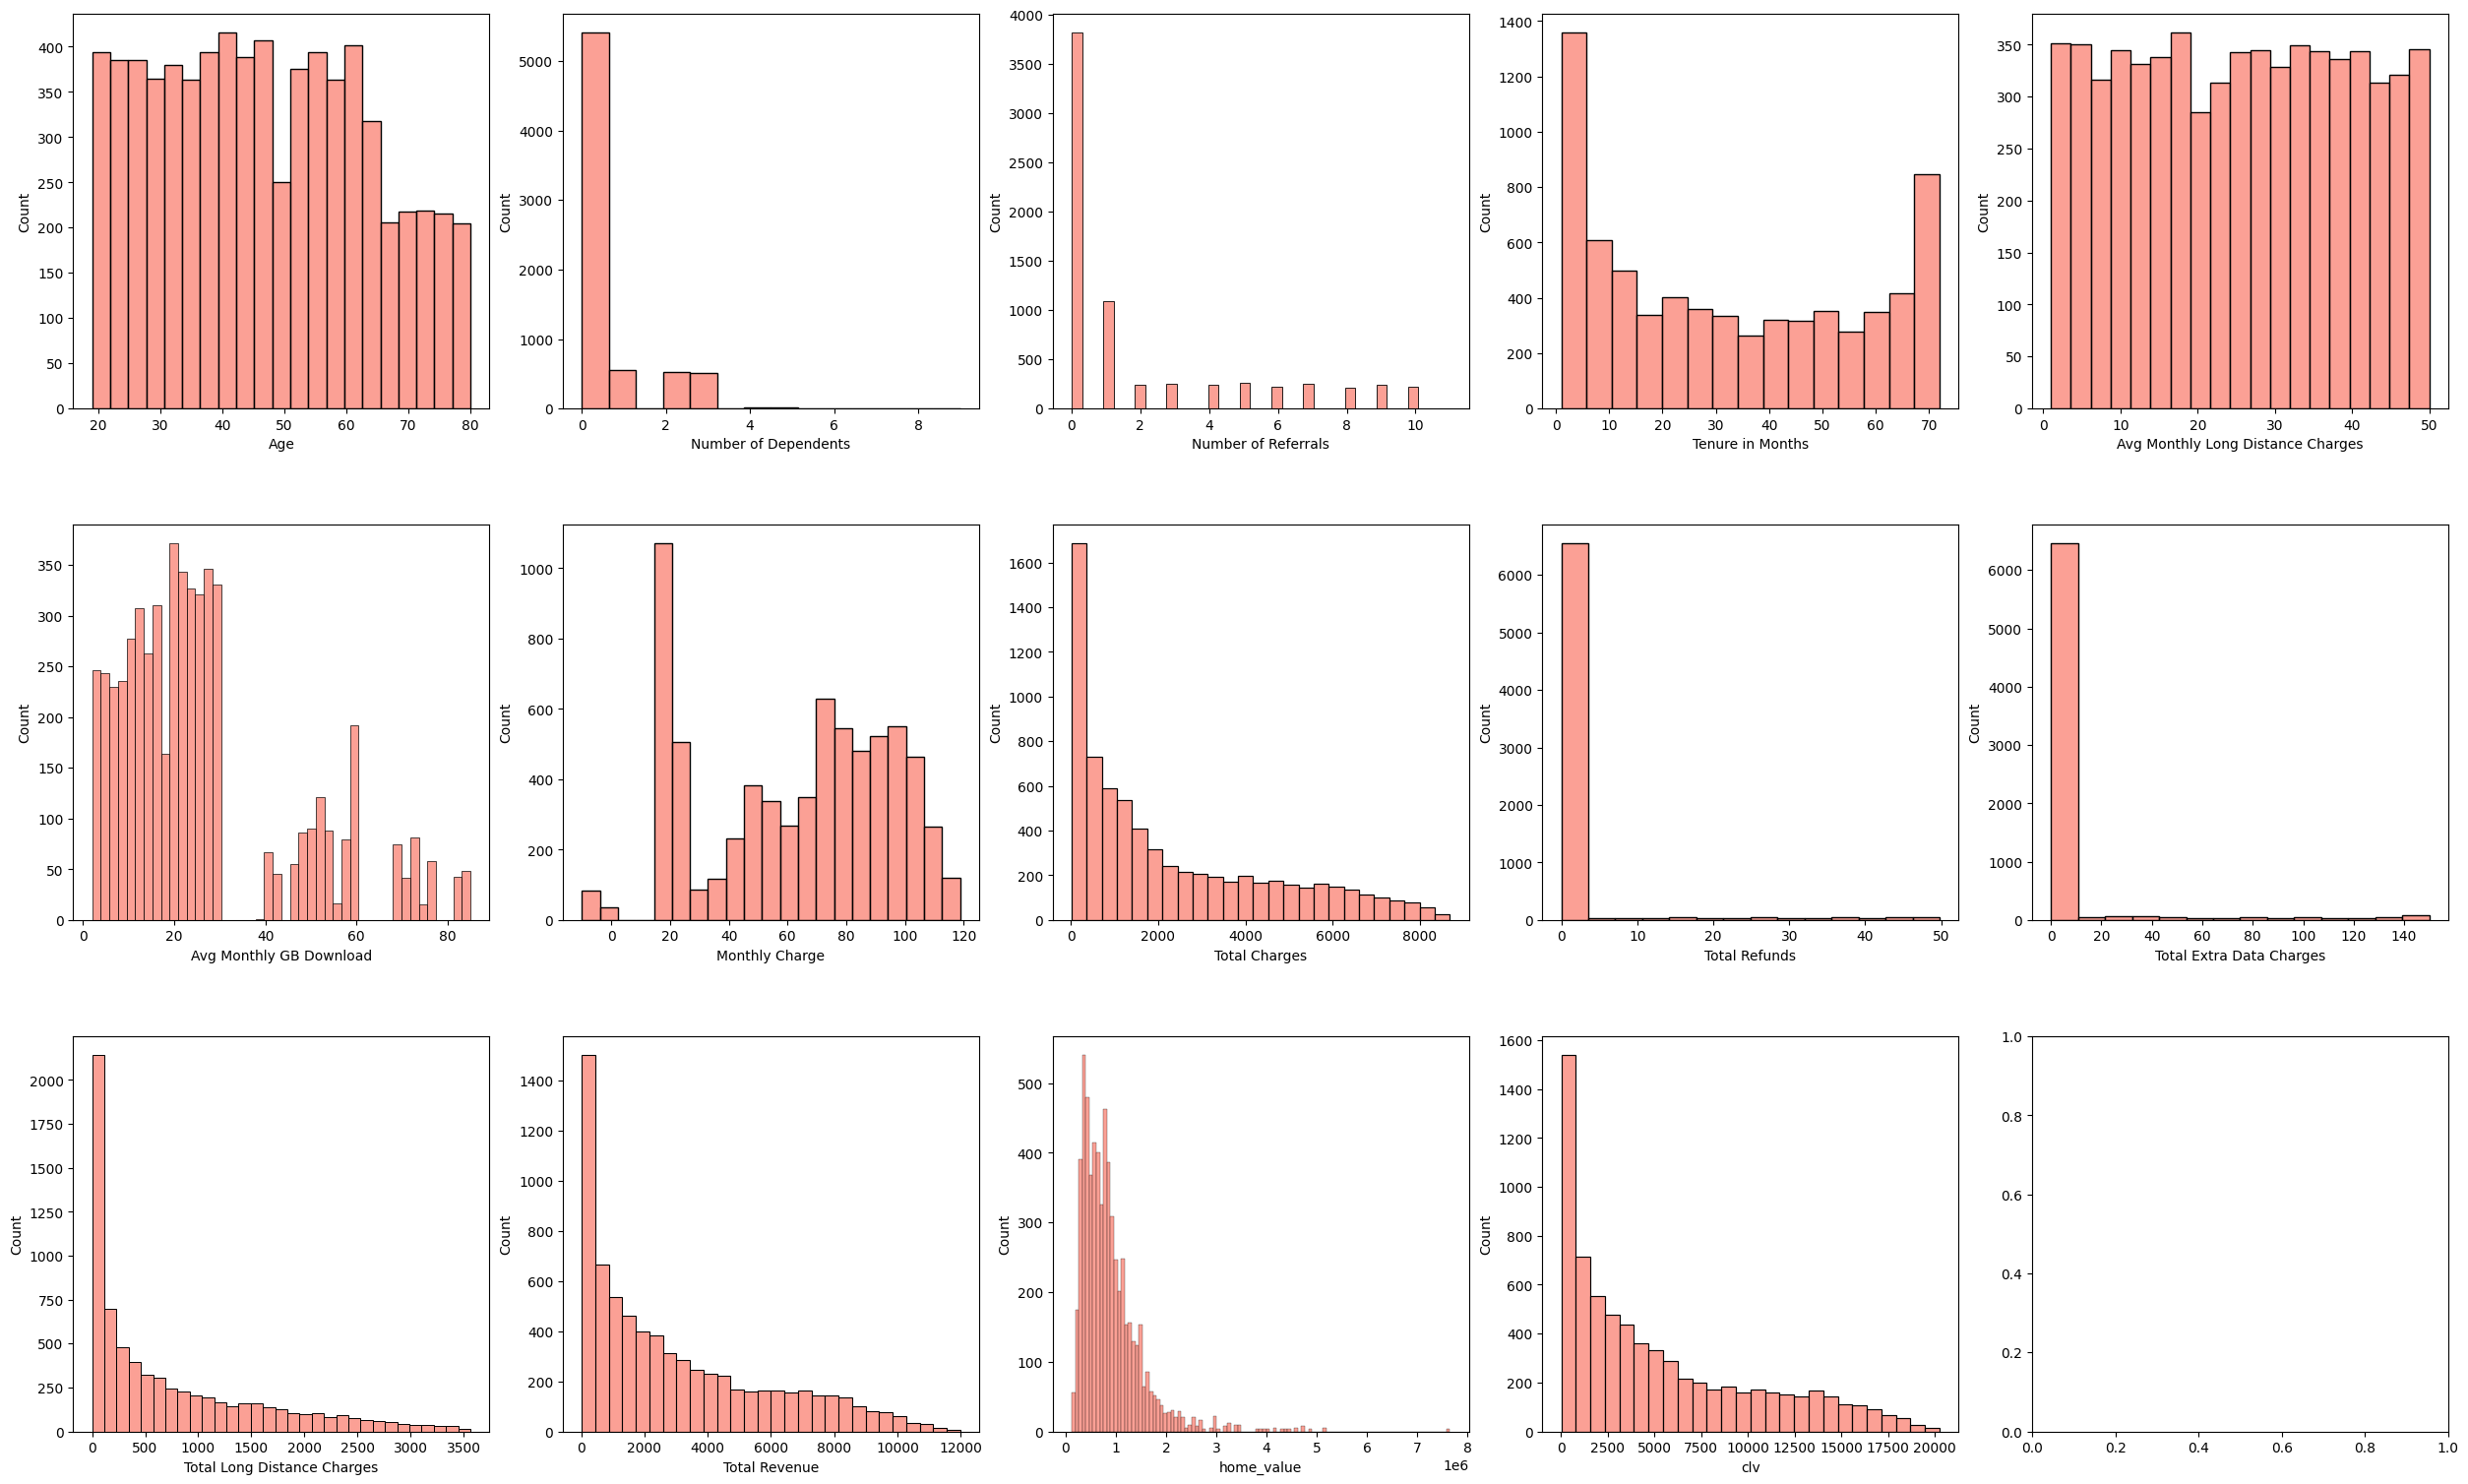

In [22]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25, 15))
axs = axs.flatten()

for index, (k, v) in enumerate(dataset.select_dtypes(include=['number']).items()):
    sns.histplot(v, ax=axs[index],color = 'salmon')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Correlation Matrix</h2>
</div>

The Highest Correlation among Features:


Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                                clv
Total Refunds                                   Tenure in Months
Total Extra Data Charges                                     clv
Total Long Distance Charges                        Total Revenue
Total Revenue                                                clv
home_value                                   Number of Referrals
clv                                                Total Revenue
dtype: object

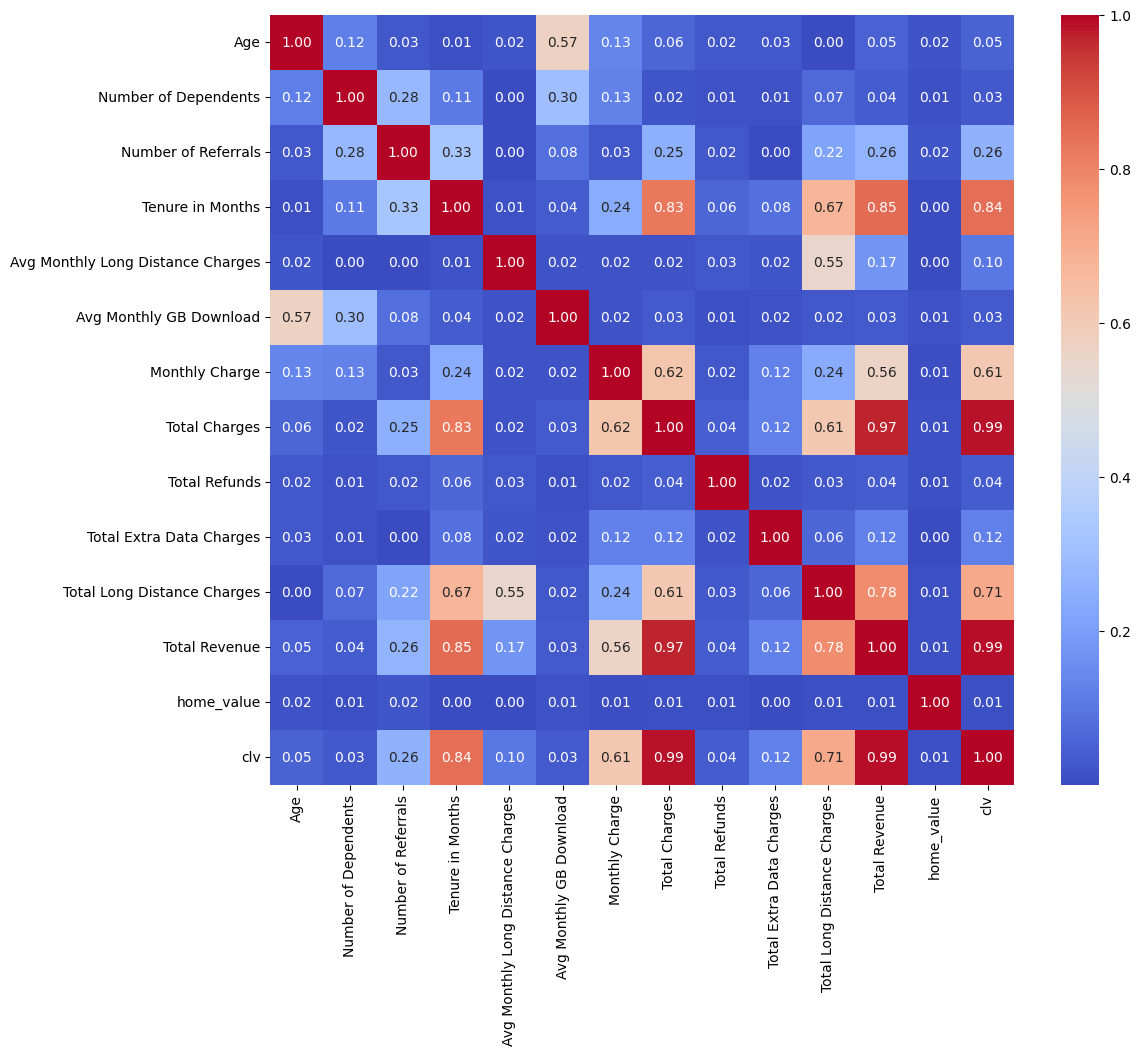

In [23]:
corr_mat = dataset.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, cmap='coolwarm', fmt=".2f")

print('The Highest Correlation among Features:')
np.fill_diagonal(corr_mat.values, 0)
corr_mat.abs().idxmax()


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <ul>
      <li>Since there is a large correlation between <b>Total Charges</b> and <b>Total Revenue</b> with the <b>CLV</b> both are removed from dataset to avoid redundancy.</li>
  </ul>
</div>

In [23]:
# Remove columns from dataset
dataset = dataset.drop(['Total Charges','Total Revenue'],axis=1)

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Identify possible skewage</h2>
</div>

In [26]:
data_skewed = dataset.select_dtypes(include=['number'])

# Calculate skewness of numerical features
skewness = data_skewed.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Age                                  0.162152
Number of Dependents                 1.276444
Number of Referrals                  0.294795
Tenure in Months                     0.240491
Avg Monthly Long Distance Charges         NaN
Avg Monthly GB Download                   NaN
Monthly Charge                      -0.275335
Total Refunds                        3.239720
Total Extra Data Charges             2.605711
Total Long Distance Charges         -0.029510
home_value                                NaN
clv                                  0.940256
dtype: float64


In [27]:
# Those features with higher skewage are transformed
skewed_features = ['Number of Dependents','Number of Referrals','Total Refunds','Total Extra Data Charges','Total Long Distance Charges']
pt = PowerTransformer(method='yeo-johnson')
dataset[skewed_features] = pt.fit_transform(dataset[skewed_features])

In [28]:
data_skewed = dataset.select_dtypes(include=['number'])

# Calculate skewness of numerical features
skewness = data_skewed.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Age                                  0.162152
Number of Dependents                 1.276414
Number of Referrals                  0.232659
Tenure in Months                     0.240491
Avg Monthly Long Distance Charges         NaN
Avg Monthly GB Download                   NaN
Monthly Charge                      -0.275335
Total Refunds                        3.239720
Total Extra Data Charges             2.605711
Total Long Distance Charges         -0.003153
home_value                                NaN
clv                                  0.940256
dtype: float64


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Handle numerical null values</h2>
</div>

In [29]:
# Count null values
print("Null values in numerical features:\n",dataset.select_dtypes(include=['number']).isna().sum())

Null values in numerical features:
 Age                                     0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
Monthly Charge                          0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
home_value                            637
clv                                     0
dtype: int64


<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h2>Handle Numerical Null Values</h2>
    <ul>
        <li>The <b>Avg Monthly Long Distance Charges</b> and the <b>Avg Monthly GB Download</b> columns are product of having internet service or phone line service.</li>
        <li>The nominal columns contain this information.</li>
        <li>Null values are then considered as 0.</li>
        <li> For the case of <b>home_value</b>, there seems to be some zip codes missing from the Zillow dataset. In that case the null cases will be assumed as the median of the rest of the column.</li>
</div>

In [30]:
# Handle null values
column_name = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in column_name:
  dataset[column] = dataset[column].apply(lambda x: 0 if pd.isnull(x) else x)

In [31]:
# Null values changed to column's median value.
dataset['home_value'].fillna(dataset['home_value'].median(), inplace=True)

C:\Users\mirot\AppData\Local\Temp\ipykernel_24372\5231046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['home_value'].fillna(dataset['home_value'].median(), inplace=True)


In [32]:
#Null values count
print("Null values in numerical features:\n",dataset.select_dtypes(include=['number']).isna().sum())

Null values in numerical features:
 Age                                  0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
home_value                           0
clv                                  0
dtype: int64


<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <h2>Nominal Features</h2>
  <ul>
      <li>Feature Engineering</li>
      <li>Data Visualization</li>
      <li>Lable Encoding</li>
  </ul>

In [33]:
dataset.describe(include=['object']).T

,count,unique,top,freq
Gender,7043,2,Male,3555
Married,7043,2,No,3641
Offer,3166,5,Offer B,824
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498
Online Backup,5517,2,No,3088
Device Protection Plan,5517,2,No,3095


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <ul>
      <li>In order to reduce model complexity, instead of having the <b>home_value</b> as a parameter, it is transformed into a categorical variable, where the mean of the house value is 'medium'.</li>
      <li>One standard deviation to the left and right turn to 'low' and 'high' house value respectively.</li>
</div>


In [34]:
# Function to turn into categorical variable
def categorize_price(price, mean, std):
    if price < mean - std:
        return 'low'
    elif price > mean + std:
        return 'high'
    else:
        return 'medium'

mean_price = dataset['home_value'].mean() # Mean of home value
std_price = dataset['home_value'].std() # Standard Deviation of home value

dataset['price_category'] = dataset['home_value'].apply(lambda x: categorize_price(x, mean_price, std_price))



In [35]:
# Drop column
dataset = dataset.drop(['home_value'],axis = 1)

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Data Visualization of nominal features</h2>
</div>

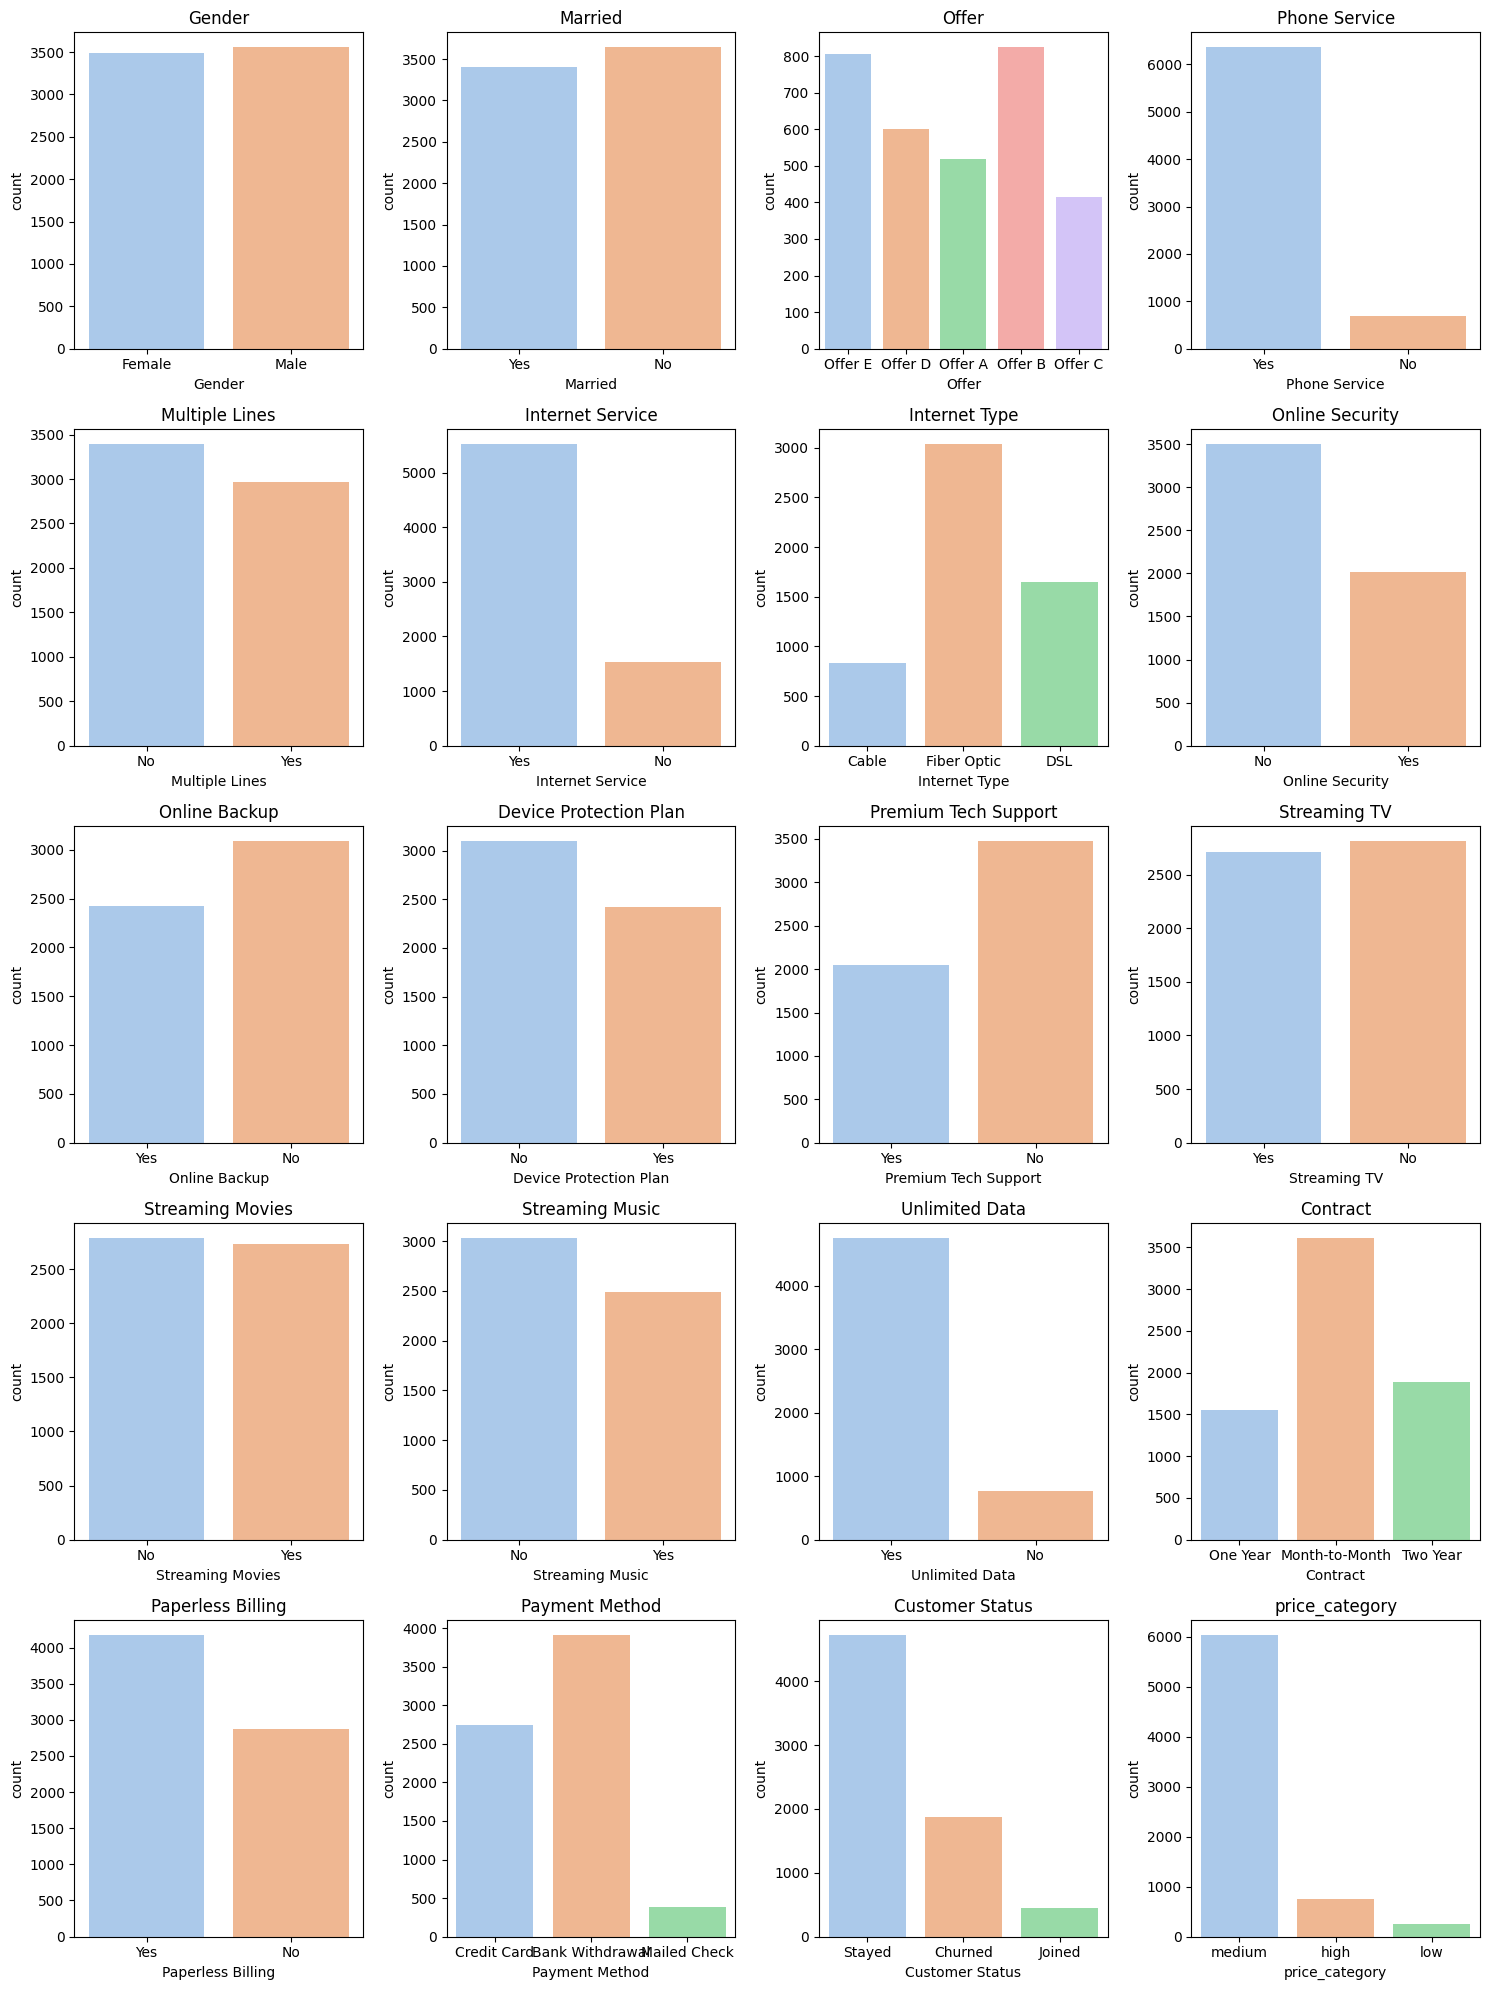

In [37]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(5, 4, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(dataset.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=dataset, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.show()


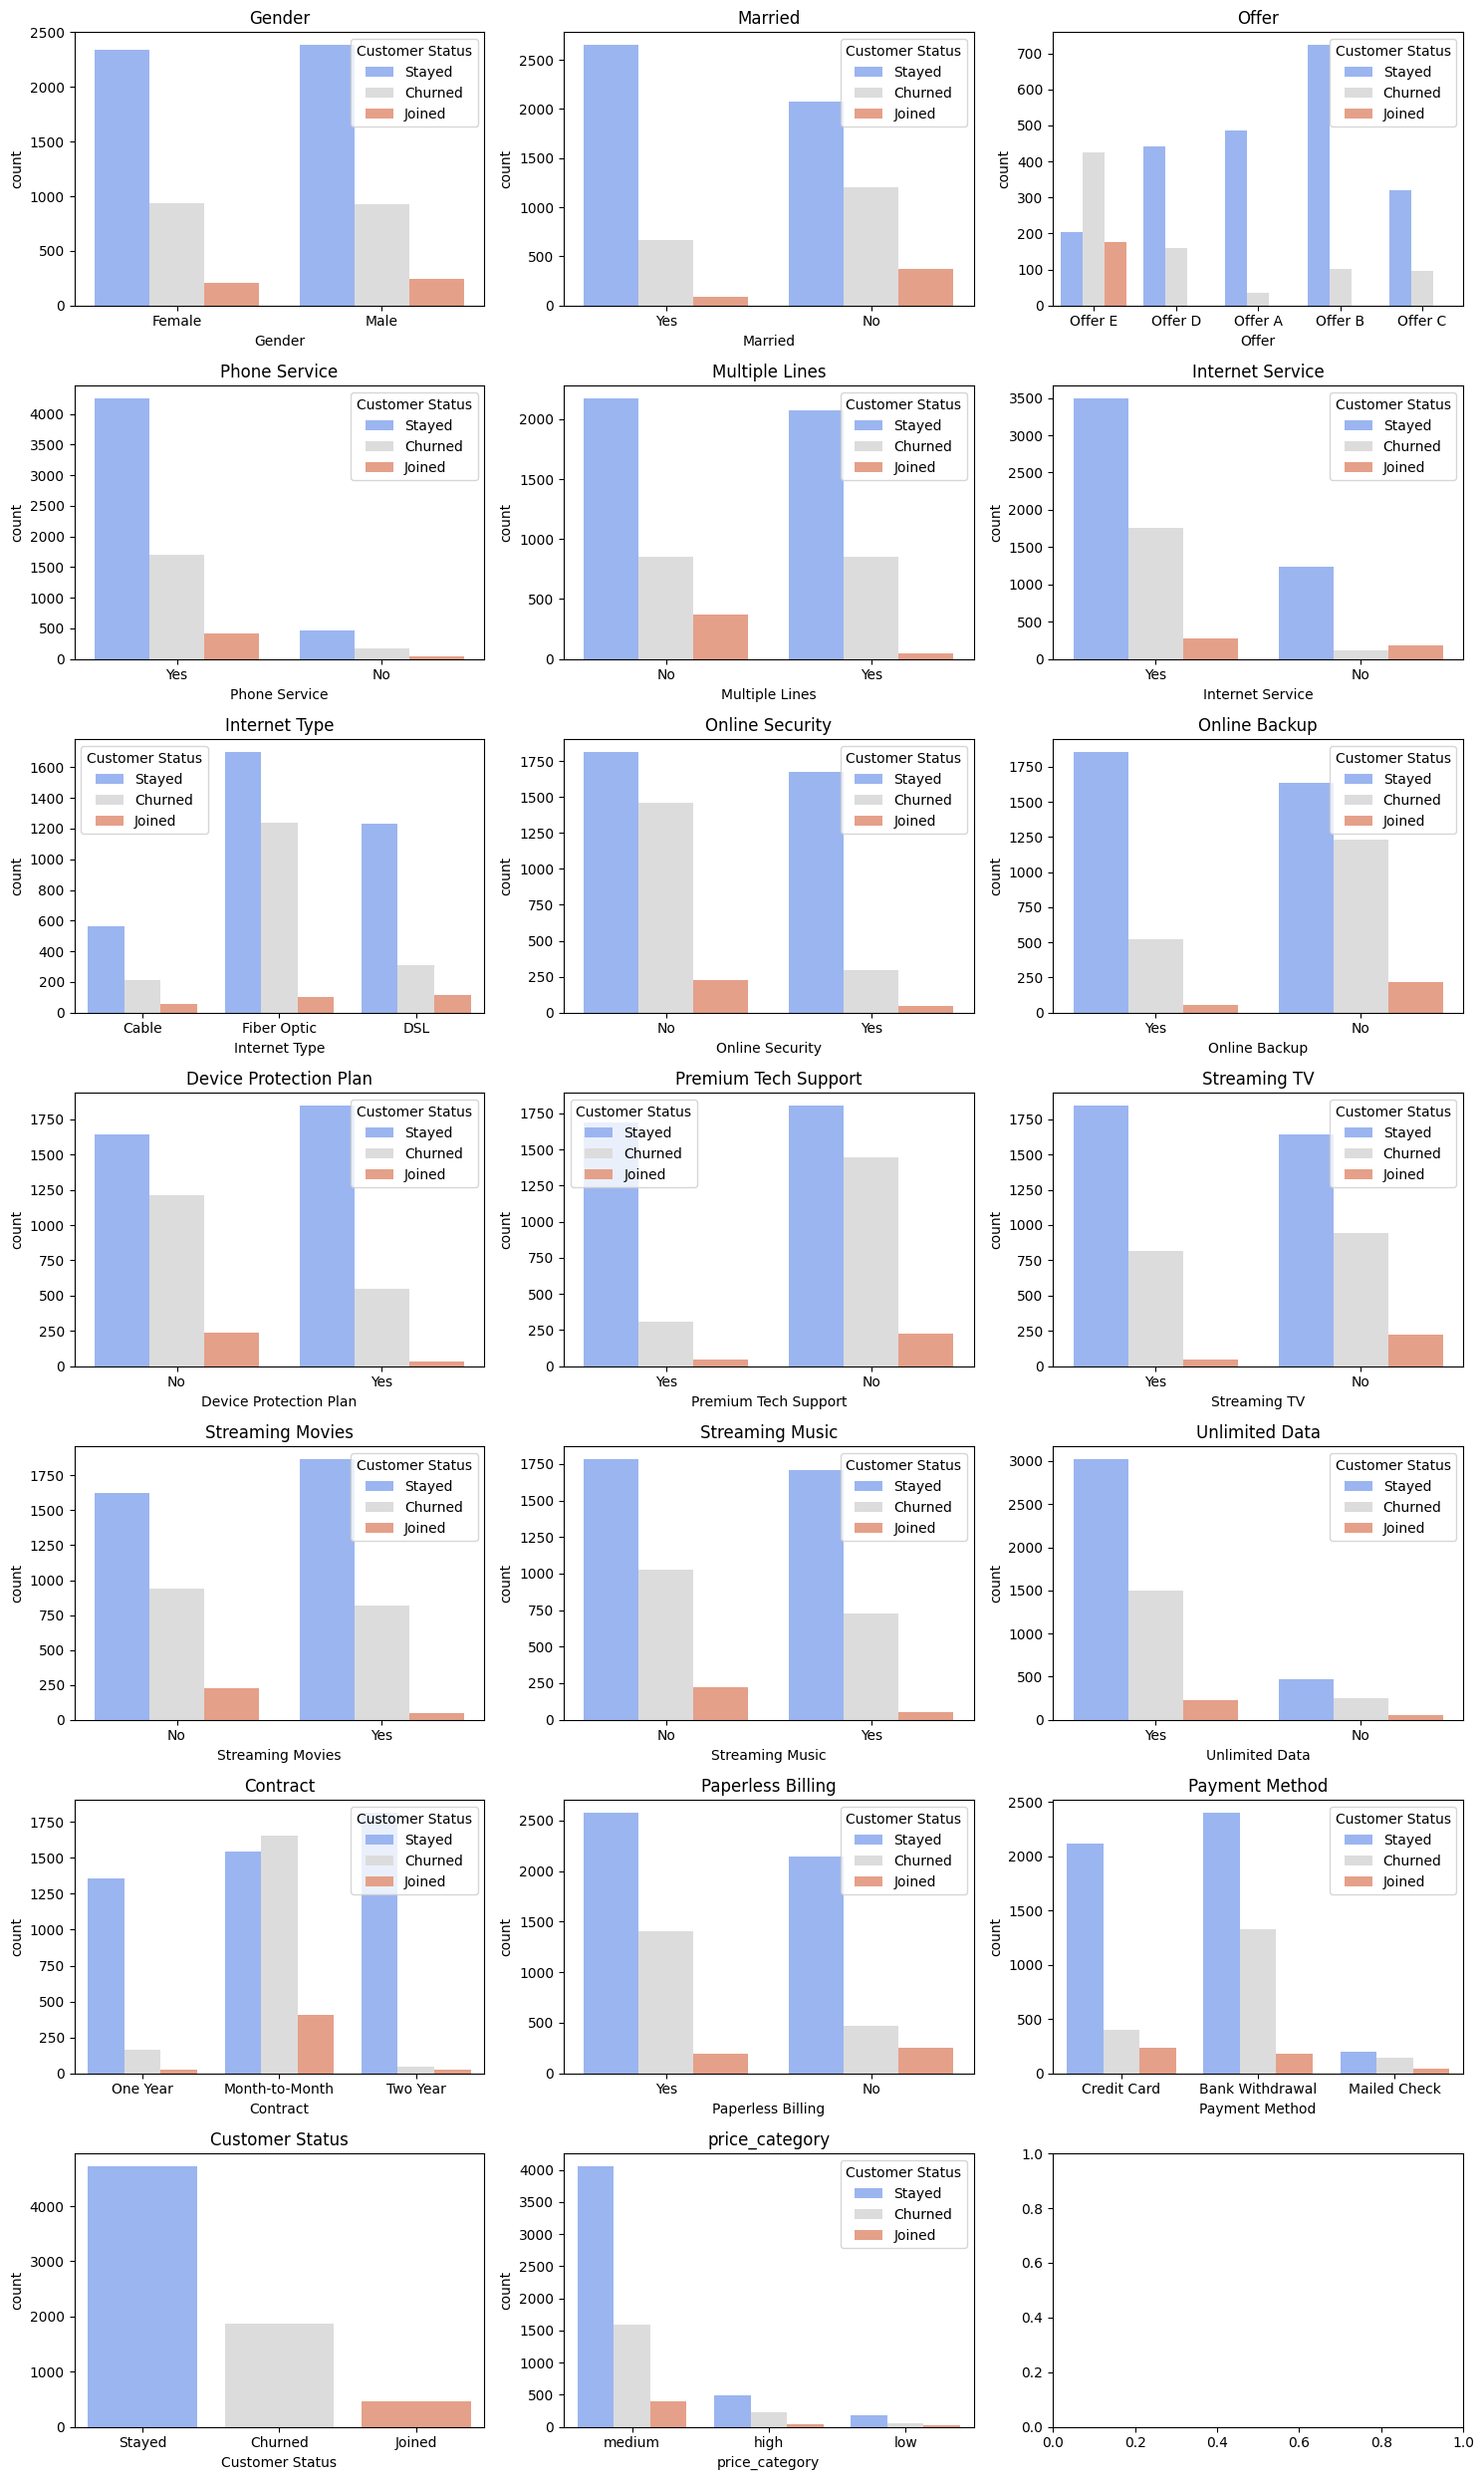

In [38]:
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flatten()

for i, col in enumerate(dataset.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=dataset, hue='Customer Status', ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.show()

<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Handle nominal null values</h2>
</div>

In [39]:
print(f"Null values in nominal features:\n{dataset.select_dtypes(include=['object']).isna().sum()}")

Null values in nominal features:
Gender                       0
Married                      0
Offer                     3877
Phone Service                0
Multiple Lines             682
Internet Service             0
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
price_category               0
dtype: int64


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <ul>
      <li>Among the <b>Offer</b> options there was not option indicating the customer had no offer, so the null values in offer are then changed to 'no_offer'.</li>
      <li>The null values ranging from <b>Internet Type</b> down to <b>Unlimited Data</b> are a product of the customers that do not have internet service. For that reason the null values are transformed to 'no_internet'.</li>
      <li>The <b>Multiple Lines</b> column is more complicated to address, but since it corresponds to less than 10% of the overall dataset, they are assumed to be 'No'.</li>
</div>

In [40]:
# Change null values to 'no offer' or 'no internet'
dataset['Offer'] = dataset['Offer'].apply(lambda x: 'no_offer' if pd.isnull(x) else x)

column_name = ['Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV',
               'Streaming Movies','Streaming Music','Unlimited Data']
for column in column_name:
  dataset[column] = dataset[column].apply(lambda x: 'no_internet' if pd.isnull(x) else x)

In [41]:
dataset['Multiple Lines'].fillna('No', inplace=True)

In [42]:
# Check for null nominal values 
print(f"Null values in nominal features:\n{dataset.select_dtypes(include=['object']).isna().sum()}")

Null values in nominal features:
Gender                    0
Married                   0
Offer                     0
Phone Service             0
Multiple Lines            0
Internet Service          0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Customer Status           0
price_category            0
dtype: int64


<div style="background-color: #FEFAE0; padding: 10px; border-radius: 5px;">
  <h2>Label Encoding</h2>
</div>

In [43]:
print(f"Unique responses per nominal column:\n{dataset.select_dtypes(include='object').nunique()}")

Unique responses per nominal column:
Gender                    2
Married                   2
Offer                     6
Phone Service             2
Multiple Lines            2
Internet Service          2
Internet Type             4
Online Security           3
Online Backup             3
Device Protection Plan    3
Premium Tech Support      3
Streaming TV              3
Streaming Movies          3
Streaming Music           3
Unlimited Data            3
Contract                  3
Paperless Billing         2
Payment Method            3
Customer Status           3
price_category            3
dtype: int64


<div style="background-color: #C0C78C; padding: 10px; border-radius: 5px;">
  <ul>
      <li>Two-option columns are transformed to binary columns.</li>
      <li>The target column <b>Customer Status</b> is labeled encoded from 0 to 2.</li>
      <li>Churn: 0, Joined: 1, Stayed: 2</li>
      <li>The rest of the columns are getting dummies.</li>
  </ul>

In [47]:
# Transform to binary columns
binary_columns = ['Gender', 'Married', 'Phone Service','Multiple Lines','Internet Service','Paperless Billing']
dataset[binary_columns] = dataset[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

In [48]:
#Label Encode target variable
label_encoder = LabelEncoder()
dataset['Customer Status'] = label_encoder.fit_transform(dataset['Customer Status'])

In [49]:
# Get dummer for the rest of the columns
dataset = pd.get_dummies(dataset, drop_first=True)

In [50]:
# Save to csv for training
dataset.to_csv('./Data/preprocessed_dataset.csv',index = False)